# <center>Логистическая регрессия</center>

**Задача классификации (classification)** — задача, в которой мы пытаемся предсказать класс объекта на основе признаков в наборе данных. То есть задача сводится к предсказанию целевого признака, который является категориальным.

* Когда классов, которые мы хотим предсказать, только два, классификация называется **бинарной**.

* Когда классов, которые мы хотим предсказать, более двух, классификация называется **мультиклассовой (многоклассовой)**. 

Что вообще означает «решить задачу классификации»? Это значит построить разделяющую поверхность в пространстве признаков, которая делит пространство на части, каждая из которых соответствует определённому классу. 

Модели, которые решают задачу классификации, называются **классификаторами (classifier)**.

Модель должна выдавать некоторую вероятность $P$, которая будет определять, принадлежит ли данный объект к классу 1: например, вероятность того, что письмо является спамом. При этом вероятность того, что письмо является обычным письмом (класс 0), определяется как $Q=1-P$.  

Когда модель будет обучена на предсказание вероятности, мы зададим некоторый порог вероятности. Если предсказанная вероятность будет выше этого порога, мы определим объект к классу 1, а если ниже — к классу 0.

Например, стандартный порог равен 0.5. То есть если вероятность $P>0.5$, мы будем считать письмо спамом, а если $P \leq 0.5$ — обычным информативным письмом.

В итоге мы добьёмся того, что будем предсказывать не дискретный категориальный, а непрерывный числовой признак, который лежит в диапазоне [0, 1]. А это уже знакомая нам задача регрессии.

Остался главный вопрос: как научить модель предсказывать вероятности, ведь они должны лежать строго в диапазоне от 0 до 1, а предсказания линейной регрессии лежат в диапазоне от $-\infty$ до $+\infty$? 

Тут-то мы и приходим к модели логистической регрессии — **регрессии вероятностей**.

**Логистическая регрессия (Logistic Regression)** — одна из простейших моделей для решения задачи классификации. Несмотря на простоту, модель входит в топ часто используемых алгоритмов классификации в Data Science.

В основе логистической регрессии лежит **логистическая функция (logistic function) $\sigma(z)$** — отсюда и название модели. Однако более распространённое название этой функции — **сигмόида (sigmoid)**. Записывается она следующим образом:

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

Здесь $e$ — экспонента или число Эйлера. Это число является бесконечным, а его значение обычно принимают равным 2.718...

График зависимости сигмоиды от аргумента $z$:

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml3-2_3.png)

У сигмоиды есть два очень важных для нас свойства:

* Значения сигмоиды $\sigma(z)$ лежат в диапазоне от 0 до 1 при любых значения аргумента $z$: какой бы $z$ вы ни подставили, число меньше 0 или больше 1 вы не получите.

* Сигмоида выдаёт значения $\sigma(z)>0.5$ при её аргументе $z>0$, $\sigma(z)<0.5$ — при $z<0$ и $\sigma(z)=0.5$ — при $z=0$.

В математике принято писать оценочные величины с «шапкой» наверху, а истинные значения — без «шапки», это чистая формальность.

Мы будем называть оценки вероятности ($\hat{P}$) просто вероятностью, но только для краткости. Это не значит, что эти оценки являются истинными вероятностями принадлежности к каждому из классов (их нельзя сосчитать, так как для этого нужна выборка бесконечного объёма). Если вы употребляете термин «вероятности» на собеседованиях, обязательно предварительно укажите, что вы подразумеваете оценку вероятности.

Основная идея модели логистической регрессии: возьмём модель линейной регрессии (обозначим её выход за $z$):

$$z=w_{0}+\sum_{j=1}^{m} w_{j} x_{j}$$

И подставим выход модели $z$ в функцию сигмоиды, чтобы получить искомые оценки вероятности:\

$$\hat{P}=\sigma(z)=\frac{1}{1+e^{-z}}=\frac{1}{1+e^{-w_{0}-\sum_{j=1}^{m} w_{j} x_{j}}}=\frac{1}{1+e^{-\bar{w} \cdot \bar{x}}}$$

Обучать будем всё в совокупности, пытаясь получить наилучшую оценку вероятности $\hat{P}$. Если вероятность $\hat{P} > 0.5$, относим объект к классу 1, а если $\hat{P} \leq 0.5$, относим объект к классу 0. 

Математически это записывается следующей формулой:

$$\hat{y}=I[\hat{P}]=\left\{\begin{array}{l} 1, \hat{P}>0.5 \\ 0, \hat{P} \leq 0.5 \end{array}\right.$$

В данном выражении $I[ \hat{P}]$ называется **индикаторной функцией**. Она возвращает 1, если её значение больше какого-то порога, и 0 — в противном случае. Математики часто записывают просто квадратные скобки, опуская символ $I$: $[\hat{P}]$.

Если мы обучим модель, то есть подберём  коэффициенты таким образом, что для объектов класса 1 модель линейной регрессии начнёт выдавать положительное число, а для класса 0 — выдавать отрицательное число, то тогда, подставив предсказание линейной регрессии $z$ в сигмоиду, мы сможем получать вероятности принадлежности к каждому из классов в диапазоне от 0 до 1.

Далее по порогу вероятности мы сможем определять, к какому классу принадлежит объект.

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml3-2_4.png)

Ключевым моментом в предсказании логистической регрессии является расстояние от точки до разделяющей плоскости в пространстве факторов. Это расстояние в литературе часто называется **отступом (margin)**. 

Чем больше расстояние от точки, находящейся выше разделяющей плоскости, до самой плоскости, тем больше оценка вероятности принадлежности к классу 1.

В общем случае, когда у нас есть зависимость от  факторов, линейное выражение, находящееся под сигмоидой, будет обозначать разделяющую гиперплоскость.

$$z = w_{0} + w_{1}x_{1} + w_{2}x_{2} + ...+ w_{m}x_{m} = w_{0} + \sum_{j=1}^{m} w_{j}x_{j}$$

# <center>Поиск параметров логистической регрессии</center>

Это **метод максимального правдоподобия (Maximum Likelihood Estimation — MLE)**. 

**Правдоподобие** — это оценка того, насколько вероятно получить истинное значение целевой переменной $y$ при данных $x$ и параметрах $w$. 

Данный метод позволяет получить функцию правдоподобия. Цель метода — найти такие параметры $w=(w_{0}, w_{1}, w_{2}, ..., w_{m})$, в которых наблюдается максимум функции правдоподобия.

Конечная формула:

$$likelihood = \sum_{i}^{n} (y_{i} log (\hat{P_{i}}) + (1-y_{i}) log (1-\hat{P_{i}})) \rightarrow max_{w}$$

* $n$ — количество наблюдений.

* $y_{i}$ — это истинный класс (1 или 0) для $i$-ого объекта из набора данных.

* $\hat{P_{i}} = \sigma(z_{i})$ — предсказанная с помощью логистической регрессии вероятность принадлежности к классу 1 для $i$-ого объекта из набора данных.

* $z_{i}$ — результат подстановки $i$-ого объекта из набора данных в уравнение разделяющей плоскости $z_{i}= \bar{w} \cdot \bar{x_{i}}$.

* $log$ — логарифм (обычно используется натуральный логарифм по основанию $e - ln$).

К сожалению, функция *likelihood* не имеет интерпретации, то есть нельзя сказать, что значит число -2.34 в контексте правдоподобия.

Цель — найти такие параметры, при которых наблюдается максимум этой функции.

По правилам оптимизации, если поставить перед функцией минус, то задача оптимизации меняется на противоположную: был поиск максимума — станет поиском минимума.

Таким образом мы получим функцию потерь $L(w)$, которая носит название *«функция логистических потерь»*, или *logloss*. Также часто можно встретить название *кросс-энтропия*, или *cross-entropy loss*:

$$L(w) = \text { logloss } =-\sum_{i}^{n} (y_{i} log (\hat{P_{i}}) + (1-y_{i}) log (1-\hat{P_{i}})) \rightarrow min_{w}$$

$$\hat{P_{i}}=\frac{1}{1+e^{-w_{0}-\sum_{j=1}^{m} w_{j} x_{j}}}$$

Мы должны найти такие параметры разделяющей плоскости  $w$, при которых наблюдается минимум *logloss*.

К сожалению, для такой функции потерь аналитическое решение оптимизационной задачи найти не получится: при расчётах получается, что его попросту не существует.

Но мы помним, что, помимо аналитических решений, есть и численные.

Во избежание переобучения модели в функцию потерь логистической регрессии традиционно добавляется регуляризация. В реализации логистической регрессии в `sklearn` она немного отличается от той, что мы видели ранее для линейной регрессии.

При *L1*-регуляризации мы добавляем в функцию потерь $L(w)$ штраф из суммы модулей параметров, а саму функцию *logloss* умножаем на коэффициент $C$:

$$L(w)=C \cdot \log \operatorname{loss}+\sum_{j=1}^{m}\left|w_{j}\right| \rightarrow \min_{w}$$

А при *L2*-регуляризации — штраф из суммы квадратов параметров:

$$L(w)=C \cdot \log \operatorname{loss}+\sum_{j=1}^{m}\left(w_{j}\right)^{2} \rightarrow \min _{w}$$

Значение коэффициента $C$ — коэффициент, обратный коэффициенту регуляризации. Чем больше $C$, тем меньше «сила» регуляризации. Коэффициент $C$ — это коэффициент, обратный коэффициенту регуляризации $\alpha$.

# <center>Логистическая регрессия в Sklearn</center>

*P.S. Смотри блокнот "extra_1", часть 1*

# <center>Метрики классификации</center>

## <center>Ошибки I и II рода</center>

Для унификации терминологии в машинном обучении в большинстве задач объекты класса 1 считаются объектами с наличием некоторого эффекта (болезнь есть / задолженность погашена / клиент ушёл / устройство отказало и т. д.), а объекты класса 0 — объектами с отсутствием этого эффекта (болезни нет / задолженность не погашена / клиент не ушёл / устройство работает без отказов и т. д.).

Пусть у нас есть некоторый пациент $x_i$, и мы хотим понять, болен ли он диабетом. С точки зрения задачи классификации мы хотим предсказать истинный класс ($y_i$) пациента.

Нулевая гипотеза будет состоять в отсутствии эффекта (пациент не болен диабетом), то есть $y_i=0$, а альтернативная — в его наличии (пациент болен диабетом) , то есть $y_i=1$. В терминах статистических гипотез это будет записано так:

* $H_0$: Пациент $x_i$ не болеет диабетом $y_i=0$.
* $H_1$: Пациент $x_i$ болеет диабетом $y_i=1$.

*<u>Ошибка I (первого) рода ($\alpha$-ошибка)</u>*: отклонение нулевой гипотезы, когда она на самом деле верна, или **ложноположительный результат**. То есть мы предсказали, что пациент болен диабетом, хотя это не так.

*<u>Ошибка II (второго) рода ($\beta$-ошибка)</u>*: принятие нулевой гипотезы, когда она на самом деле ложна, или **ложноотрицательный результат**. То есть мы предсказали, что пациент здоров, хотя на самом деле он болен диабетом.

Как вы можете понять, в диагностических задачах для нас критичнее ошибка II рода. Последствия будут более серьёзными, если мы примем больного пациента за здорового, чем если мы примем здорового за больного. Нам важно охватить всех потенциально больных пациентов, чтобы сделать дополнительный анализ и удостовериться в результате.

## <center>Метрики классификации</center>

Случайным образом выбрали десять пациентов из нашей таблицы и моделью `log_reg_full` предсказали для них ответы:

$$y=(1, 0, 1, 1, 0, 1, 1, 0, 1, 1)$$

$$\hat{y}=(1, 1, 0, 1, 0, 0, 1, 1, 0, 1)$$

1) **Матрица ошибок (confusion matrix)** показывает все возможные исходы совпадения и несовпадения предсказания модели с действительностью. Используется для расчёта других метрик.

    * **Истинно положительные (True Positive, TP)** — это объекты, обозначенные моделью как класс 1 ($\hat{y}=1$) и действительно принадлежащие к классу 1 ($y=1$).

    * **Ложноположительные (False Positive, FP)** — это объекты, обозначенные моделью как класс 1 ($\hat{y}=1$), но в действительности принадлежащие к классу 0 ($y=0$). То есть это объекты, для которых модель совершила ошибку I рода.

    * **Истинно отрицательные (True Negative, TN)** — это объекты, обозначенные моделью как класс 0 ($\hat{y}=0$) и действительно принадлежащие к классу 0 ($y=0$).

    * **Ложноотрицательные (False Negative, FN)** — это объекты, обозначенные моделью как класс 0 ($\hat{y}=0$), но в действительности принадлежащие к классу 1 ($y=1$). То есть это объекты, для которых модель совершила ошибку II рода.

Общий вид матрицы ошибок:

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@ML_3_3_1.png)

Формально матрица ошибок не является метрикой, но на её основе составляются сами метрики классификации.

2) **Accuracy (достоверность/аккуратность)** — доля правильных ответов модели среди всех ответов. Правильные ответы — это истинно положительные (*True Positive*) и истинно отрицательные ответы (*True Negative*):

$$accuracy = \frac{TP + TN}{TP + TN + FN + FP}$$

*Интерпретация*: как много (в долях) модель угадала ответов.

Метрика изменяется в диапазоне от 0 до 1. Чем ближе значение к 1, тем больше ответов модель «угадала». *Accuracy* — самая простая и самая понятная метрика классификации, но у неё есть один существенный недостаток. Она бесполезна, если классы сильно несбалансированы.

3) **Precision (точность)**, или **PPV (Positive Predictive Value)** — это доля объектов, названных классификатором положительными и при этом действительно являющихся таковыми, по отношению ко всем названным положительными объектам.

$$precision = \frac{TP}{TP+FP}$$

Метрика также изменяется от 0 до 1. 

*Интерпретация*: способность отделить класс 1 от класса 0. Чем больше *precision*, тем меньше ложных попаданий. То есть **чем ближе *precision* к 1, тем меньше вероятность модели допустить ошибку I рода**.

*Precision* нужен в задачах, где от нас требуется минимум ложных срабатываний. Чем выше «цена» ложноположительного результата, тем выше должен быть *precision*. 

В предельном случае (когда *precision* равен 1) у модели отсутствуют ложноположительные срабатывания. Важно понимать, что данный вывод справедлив только для выборки, на которой мы оцениваем метрику, то есть это не означает, что модель вовсе не может допустить ложноположительных результатов. Однако чем больше выборка, на которой мы тестируем алгоритм, тем ближе к истине будет данный вывод.

4) **Recall (полнота)**, или **TPR (True Positive Rate)** — это доля объектов, названных классификатором положительными и при этом действительно являющихся таковыми, по отношению ко всем объектам положительного класса.

$$recall = \frac{TP}{TP + FN}$$

Метрика изменяется от 0 до 1.

*Интерпретация*: способность модели обнаруживать класс 1 вообще, то есть охват класса 1. Заметьте, что метрика зависит от количества ложноотрицательных срабатываний. То есть **чем ближе *recall* к 1, тем меньше вероятность модели допустить ошибку II рода**.

*Recall* очень хорошо себя показывает в задачах, где важно найти как можно больше объектов, принадлежащих к классу 1. 

Предельный случай (когда *recall* равен 1) означает, что модель нашла все объекты класса 1, например всех действительно больных пациентов. Однако метрика ничего не скажет о том, с какой точностью мы это сделали. Важно понимать, что данный вывод справедлив только для выборки, на которой мы оцениваем метрику, то есть это не означает, что модель вовсе не может допустить ложноотрицательных исходов. Однако чем больше выборка, на которой мы тестируем алгоритм, тем данный вывод будет ближе к истине.

> Метрики *precision* и *recall* не зависят от сбалансированности классов и в совокупности дают довольно исчерпывающее представление о классификаторе. Однако на практике часто бывает так, что увеличение одной из метрик может привести к уменьшению другой.

5) **$F_{\beta}$ (F-мера)** — это **взвешенное среднее гармоническое** между *precision* и *recall*:

$$F_{\beta} = (1+\beta^{2})\frac{precision \cdot recall}{(\beta^{2} precision) + recall}$$

$\beta$ - это вес *precision* в метрике: чем больше $\beta$, тем больше вклад.

В частном случае, когда $\beta=1$, мы получаем равный вклад для *precision* и *recall*, а формула будет выражать простое среднее гармоническое, или метрику $F_{1}$ ($F_{1}$-мера):

$$F_{1} = 2\frac{precision \cdot recall}{precision + recall}$$

Метрика равна своему максимуму (1), если и *precision*, и *recall* равны 1 (то есть когда отсутствуют как ложноположительные, так и ложноотрицательные срабатывания). Но если хотя бы одна из метрик будет близка к 0, то и $F_{1}$ будет близка к 0. 

> Ещё одно небольшое, но очень важное замечание: все суждения, которые мы привели по отношению к *precision*, *recall* и *$F$-мере*, относятся только к классу 1, так как эти метрики по умолчанию считаются для класса 1. Для решения большинства задач знания о значении этих метрик для класса 1 более чем достаточно, так как обычно нас интересует именно наличие некоторого эффекта.

> Однако если вам по каким-то причинам необходимо рассчитать *precision*, *recall* и *$F$-меру* для класса 0, для этого достаточно сделать перекодировку классов — поменять их обозначения местами или (при расчёте метрик с помощью библиотеки `sklearn`) изменить значение специального параметра `pos_label` на 0.

|Название|Функция в модуле metrics|
|--------|:-----------------------|
|Accuracy (достоверность)|accuracy_score()|
|Precision (точность)|precision_score()|
|Recall (полнота)|recall_score()|
|$F_{1}$-мера|f1_score()|

## <center>Расчёт метрик на Python</center>

*P.S. Смотри блокнот "extra_1", часть 2*

## <center>Достоинства и недостатки логистической ррегресии</center>

**<u>Достоинства:</u>**

* Простой, интерпретируемый, но в то же время эффективный алгоритм.

* Поиск параметров линейный или квадратичный (в зависимости от метода оптимизации), то есть ресурсозатратность алгоритма очень низкая.

* Не требует подбора внешних параметров (гиперпараметров), так как практически не зависит от них.

**<u>Недостатки:</u>**

* Алгоритм работает хорошо, только когда классы линейно разделимы, что в реальных задачах бывает очень редко. Поэтому обычно данная модель используется в качестве *baseline*.

> Недостаток с линейной разделимостью классов можно побороть с помощью введения полиномиальных признаков, тем самым снизив смещение модели. Тогда логистическая регрессия вместо разделяющей плоскости будет означать выгнутую разделяющую поверхность сложной структуры. Однако мы знаем, что с этим трюком стоит быть аккуратным, так как можно получить переобученную модель. Поэтому в комбинации с полиномиальными признаками стоит подобрать наилучший параметр регуляризации.

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml3-3_18.png)

In [5]:
# Задание 3.6

from sklearn import metrics #метрики

y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

print('Precision: {:.2f}'.format(metrics.precision_score(y_true, y_pred)))

Precision: 0.75


In [6]:
# Задание 3.7

y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

print('Recall: {:.2f}'.format(metrics.recall_score(y_true, y_pred)))

Recall: 0.60


In [7]:
# Задание 3.8

y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

print('F1 score: {:.2f}'.format(metrics.f1_score(y_true, y_pred)))

F1 score: 0.67


# <center>Мультиклассовая классификация</center>

Что делать, когда классов, на которые необходимо разделить данные, больше 2? В таком случае используется очень простой подход, который называется **«один против всех» (one-vs-over)**.

Идея этого подхода очень простая. Если у нас есть $k$ различных классов ($k>2$), давайте обучим $k$ классификаторов, каждый из которых будет предсказывать вероятности принадлежности каждого объекта к определённому классу.

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@ML_3_4_1.png)

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml3-3_10.png)

В результате у нас получится три различных пространства вероятностей, что-то вроде трёх параллельных реальностей. Чтобы собрать всё это воедино, мы выбираем в каждой точке пространства максимум из вероятностей. Получим следующую картину:

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml3-3_11.png)

Модель логистической регрессии легко обобщается на случай мультиклассовой классификации. Пусть мы построили несколько разделяющих плоскостей с различными наборами параметров $k$, где $k$ — номер классификатора. То есть имеем $K$ разделяющих плоскостей:

$$z_{k}=w_{0 k}+\sum_{j=1}^{m} w_{j k} x_{j}=w_{k} \cdot x$$

Чтобы преобразовать результат каждой из построенных моделей в вероятности в логистической регрессии, используется функция **softmax** — многомерный аналог сигмоиды:

$$\hat{P}_{k}=\operatorname{softmax}\left(z_{k}\right)=\frac{\exp \left(\hat{y}_{k}\right)}{\sum_{k=1}^{K} \exp \left(\hat{y}_{j k}\right)}$$

Данная функция выдаёт нормированные вероятности, то есть в сумме для всех классов вероятность будет равна 1.

## <center>Мультиклассовая классификация на Python</center>

*P.S. Смотри блокнот "extra_2"*

# <center>Практика</center>

*P.S. Смотри блокнот "extra_3", часть 1 и блокнот "practice", часть 1*

# <center>Деревья решений</center>

Формально структура дерева решений — это **связный ациклический граф**. Что это значит?

* **Граф** — это абстрактная топологическая модель, которая состоит из вершин и соединяющих их рёбер.

* **Связный граф** — это граф, в котором между любой парой существует направленная связь.

* **Ациклический граф** — это граф, в котором отсутствуют циклы, то есть в графе не существует такого пути, по которому можно вернуться в начальную вершину.

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@ML_3_6_2.png)

В дереве решений можно выделить **три типа вершин**:

* **Корневая вершина (root node)** — то, откуда всё начинается. Это первый и самый главный вопрос, который дерево задаёт объекту. В примере со страхованием это был вопрос «Возраст автовладельца > 40».

* **Внутренние вершины (intermediate nodes)** — это дополнительные уточняющие вопросы, которые дерево задаёт объекту. 

* **Листья (leafs)** — конечные вершины дерева. Это вершины, в которых содержится конечный «ответ» — класс объекта.

Максимально возможная длина от корня до самых дальних листьев (не включая корневую) называется **максимальной глубиной дерева (max depth)**.

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@ML_3_6_3.png)

Логический критерий, который находится в каждой вершине, называется **предикатом**, или **решающим правилом**.

На самом деле все предикаты — это просто взятие порога по значению какого-то признака. Формально это записывается следующим образом:

$$B_{v}(x, t)=I\left[x_{j} \leq t\right]$$

Предикат вершины дерева $B_{v}$ (где $v$ — это номер вершины) равен 1 («Да»), если признак $x_{j}$ меньше либо равен значению $t$, и 0 («Нет») — в противном случае. Функция $I$ с квадратными скобками — это уже знакомая нам индикаторная функция: она равна 1, если условие внутри скобок выполняется, и 0 — в противном случае.

Если результат предиката равен 1, то мы переходим по левой ветви дерева к следующему узлу, в противном случае — по правой ветви дерева к следующему узлу.

Каждый новый вопрос дерева решений при его обучении разбивает пространство признаков на две части: в первую часть отправляются наблюдения, для которых предикат истинен, а во вторую — для которых он ложен.

> В зависимости от реализации предикат может быть с условием $\leq$ или $\geq$. В реализации *sklearn* используется условие $\leq$. Но вы можете встретить другую формулировку предикатов в иных реализациях или в литературе.

Пусть мы обучили на этих данных дерево решений с максимальной глубиной 2. Оно получилось вот таким:

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml3-5_4.png)

В каждом блоке указаны следующие данные:

* *Предикат* $I\left[x_{j} \leq t\right]$ — условие, по которому выборка делится на две части: на ту, для которой условие выполняется, и ту, для которой не выполняется.

* *gini* — критерий информативности Джини, о котором мы поговорим чуть позже.

* *samples* — количество объектов, которые мы проверяем на данном шаге.

* *value* — распределение по классам для объектов, которые мы проверяем на данном шаге: например `value=[0, 50, 50]` означает, что на текущем этапе разделения в выборке находится 0 объектов класса *setosa* и по 50 объектов классов *versicolor* и *virginica*.

* *class* — класс, который мы присваиваем, если завершим выполнение алгоритма на данном шаге.

А вот так будет выглядеть наш процесс разделения цветов на классы:

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml3-5_5.png)

Для каждой области можно подсчитать вероятность каждого из классов. Это просто отношение количества объектов $k$-класса, которые попали в лист дерева, к общему количеству объектов в листе.

Например, для синей области вероятности будут равны:

$$\hat{P} (класс \ = \ setosa) = \frac{0}{54} = 0$$

$$\hat{P} (класс \ = \ virginica) = \frac{5}{54} = 0.09$$

$$\hat{P} (класс \ = \ versicolor) = \frac{49}{54} = 0.91$$

## <center>Процесс построения дерева решений<center>

Мы рассмотрим стратегию, реализованную в библиотеке *sklearn*, — алгоритм **CART (Classification and Regression Tree)**, который предназначен для построения бинарных деревьев решений (деревьев, у которых каждая вершина связана с двумя другими вершинами нижнего уровня). Данный алгоритм, как следует из его названия, предназначен для решения задач классификации и регрессии.

Пусть у нас есть матрица наблюдений `X` и столбец с ответами — метками классов `y`. На основе примеров и ответов мы хотим построить дерево решений, которое будет производить классификацию.

Псевдокод рекурсивной функции для построения решающего дерева будет выглядеть следующим образом:
```python
def build_decision_tree(X, y):
    node = Node()
    if stopping_criterion(X, y) is True:
        node = create_leaf_with_prediction(y)
	return node
    else:
        X_left, y_left, X_right, y_right = best_split(X, y)
        node.left = build_decision_tree(X_left, y_left)
        node.right = build_decision_tree(X_right, y_right)
```

Как работает алгоритм:

1) Создать новую вершину *node*.

На первой итерации это будет корневая вершина. На последующих это будут внутренние вершины.

2) Проверить некоторый критерий остановки `stop_criterion()`.

Например, критерием остановки может быть следующее условие: все объекты, которые попали в вершину, — это объекты одного и того же класса.

Или достигнута максимальная глубина дерева (`max_depth`), например 5. Это значит, что дерево не будет продолжать делиться, если глубина уже равна 5.

Другой критерий: число наблюдений в листе (в *sklearn* этот параметр обозначен как `min_samples_leaf`) меньше заданного, например 7. Это значит, что при выполнении такого условия дерево продолжит делиться в том случае, если решающее правило выполняется как минимум для 7 наблюдений.

*  **Если условие остановки выполняется:**

Проверить, какой класс преобладает в текущей вершине. Превратить текущую вершину дерева в лист, где всем наблюдениям, которые попали в эту вершину, присвоить метку преобладающего класса.

Прекратить построение дерева, вернув из алгоритма полученный лист.

* **Если условие остановки не выполняется:**

Среди всех возможных предикатов $B_{v}(x, t)=I\left[x_{j} \leq t\right]$ найти такой, который обеспечивает разбиение выборки наилучшим образом. Назовём эту часть алгоритма некоторой абстрактной функцией `best_split()`.

В результате разбиения будут созданы два набора данных:

`X_left, y_left` (левый), для которого выполняется условие $x_{j} \leq t$;

`X_right, y_right` (правый), для которого условие не выполняется.

То есть происходит рекурсивный вызов функции `build_decision_tree()`, и для каждой новой вершины алгоритм повторяется вновь с новым набором данных.

## <center>Поиск параметров дерева решений<center>

Важно понимать, что дерево решений — это топологический алгоритм, а не аналитический, то есть структуру дерева не получится описать в виде формулы, как те же линейные модели. Поэтому про стандартные методы оптимизации, такие как градиентный спуск или тем более метод наименьших квадратов, можно забыть. 

Чтобы интуитивно понять, как организуется поиск параметров, вспомним про игру «Слова на лбу».

Неопределённость можно измерять различными способами, в деревьях решений для этого используются **энтропия Шеннона и критерий Джини**. Энтропия — это очень важное понятие, используемое в физике, теории информации и других областях. Опуская предпосылки введения этого понятия, отметим, что интуитивно энтропия соответствует степени хаоса в системе. Чем выше энтропия, тем менее упорядочена система, и наоборот.

## <center>Деревья решений в Sklearn</center>

In [11]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import model_selection #сплитование выборки
from sklearn import preprocessing #предобработка данных
%matplotlib inline

In [10]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


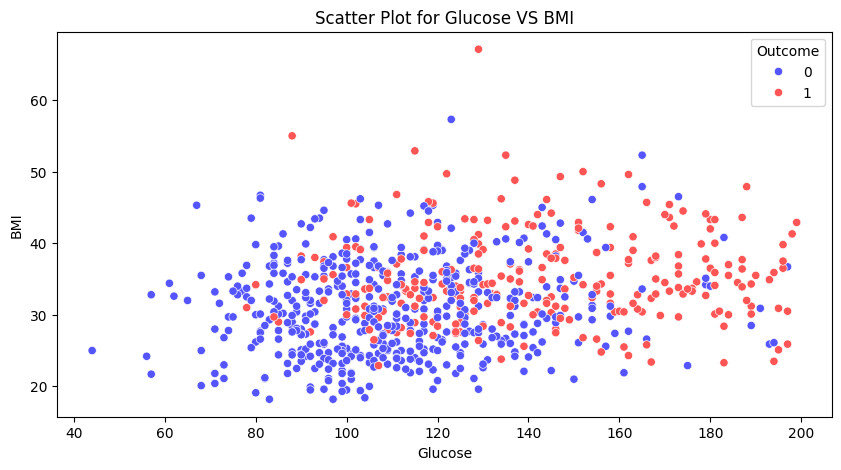

In [12]:
fig, ax = plt.subplots(figsize = (10, 5)) #фигура + координатная плоскость

#Строим диаграмму рассеяния
sns.scatterplot(
    data=diabetes_data, #датасет
    x='Glucose', #ось абсцисс
    y='BMI', #ось ординат
    hue='Outcome', #группировка
    palette='seismic', #палитра
    ax=ax, #координатная плоскость
);

#Задаём название графика
ax.set_title('Scatter Plot for Glucose VS BMI');

In [13]:
#Создаём матрицу наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

Модель дерева решений, его модификаций, а также функции для работы с деревьями находятся в модуле `tree` библиотеки *sklearn*. Импортируем его:

In [14]:
from sklearn import tree #модели деревьев решения

Модель дерева решений для решения задачи классификации реализована в классе `DecisionTreeClassifier`. Данный класс реализует обучение по алгоритму *CART*.

Основные параметры `DecisionTreeClassifier`:

* `criterion` — критерий информативности (`'gini'` — критерий Джини и `'entropy'` — энтропия Шеннона).

* `max_depth` — максимальная глубина дерева (по умолчанию — `None`, глубина дерева не ограничена).

* `max_features` — максимальное число признаков, по которым ищется лучшее разбиение в дереве (по умолчанию — `None`, то есть обучение производится на всех признаках). Нужно потому, что при большом количестве признаков будет «дорого» искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков.

* `min_samples_leaf` — минимальное число объектов в листе (по умолчанию — 1). У этого параметра есть понятная интерпретация: если он равен 5, то дерево будет порождать только те решающие правила, которые верны как минимум для пяти объектов.

* `random_state` — число, отвечающее за генерацию случайных чисел.

Обучим дерево решений с критерием информативности `criterion='entropy'` (энтропия Шеннона), максимальной глубиной `max_depth=3` и параметром `random_state=42`.

In [15]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_2d = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности 
    max_depth=3, #максимальная глубина
    random_state=42 #генератор случайных чисел
)

#Обучаем дерево решений по алгоритму CART
dt_clf_2d.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

Мы обучили дерево решений. Обученное дерево можно визуализировать в виде графа, чтобы посмотреть, как дерево делает предсказание. Для этого есть функция `plot_tree()` из модуля *tree*.

Основные параметры функции:

* `decision_tree` — объект обученного дерева решений,
* `feature_names` — наименования факторов,
* `class_names` — названия классов,
* `filled` — добавлять ли расцветку вершин графа.

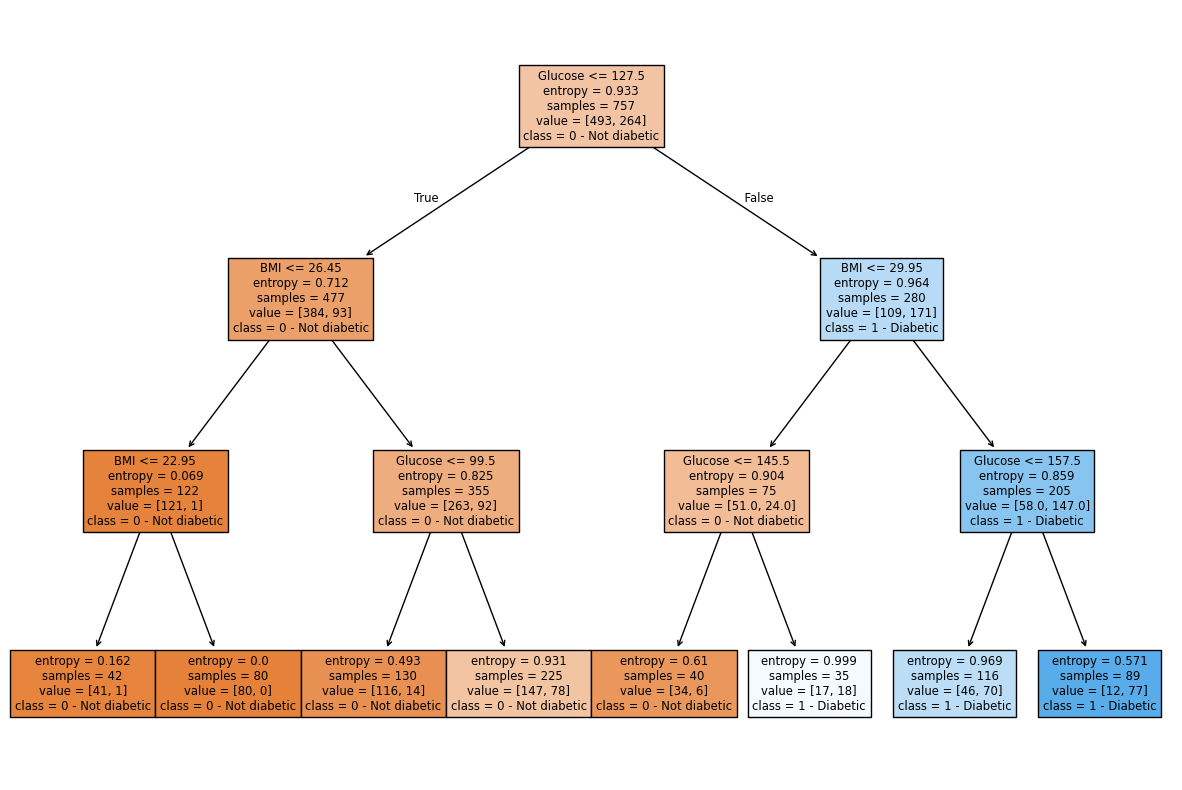

In [16]:
#Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))

#Строим граф дерева решений
tree.plot_tree(
    dt_clf_2d, #объект обученного дерева
    feature_names=X.columns, #наименования факторов
    class_names=["0 - Not diabetic", "1 - Diabetic"], #имена классов
    filled=True, #расцветка графа
);

В каждой из вершин записана следующая информация:

* предикат, по которому происходит разбиение;
* *entropy* — значение энтропии в текущей выборке;
* *samples* — количество объектов;
* *values* — количество объектов каждого из классов;
* *class* — преобладающий класс, на основе которого будет сделано предсказание.

Появился новый пациент с концентрацией глюкозы 180 мг/100 мл и индексом массы тела $51 \ кг/м^{2}$. Мы хотим вычислить вероятность наличия/отсутствия диабета у такого пациента.  Если предикат равен True, то идём по левому ребру вглубь графа, а если False — по правому.

1) `[Glucose <= 127.5] = False`. Переходим в правую вершину.

2) `[BMI <= 29.49] = False`. Переходим в правую вершину.

3) `[Glucose <= 157.5] = False`. Переходим в правую вершину.

4) Мы добрались до листовой вершины, которая соответствует объектам класса 1 — *Diabetic*. Значит, дерево определит данного пациента как больного диабетом.

Вероятность наличия диабета в данном листе равна $77/(12+77)=0.865$.

Вероятность отсутствия диабета: $12/(12+77) = 0.135$.

Описанные выше операции дерево производит автоматически с помощью функций `predict()` — для предсказания класса объекта.

И `predict_proba()` — для предсказания вероятности принадлежности к каждому из классов:

In [19]:
#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]

#Делаем предсказание класса:
y_new_predict = dt_clf_2d.predict(x_new)
print('Predicted class: {}'.format(y_new_predict))

# Predicted class: [1]

Predicted class: [1]


c:\Users\Антон\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [20]:
#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]

#Делаем предсказание вероятностей:
y_new_proba_predict = dt_clf_2d.predict_proba(x_new)
print('Predicted probabilities: {}'.format(np.round(y_new_proba_predict, 3)))

# Predicted probabilities: [[0.135 0.865]]

Predicted probabilities: [[0.135 0.865]]


c:\Users\Антон\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Посмотрим, как будет выглядеть разделяющая поверхность дерева решений для двух признаков. Для этого воспользуемся функцией `plot_probabilities_2d()`:

In [21]:
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от 40 до 200, BMI — от 10 до 80
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(40, 200, 0.1),
        np.arange(10, 80, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(data=X, x='Glucose', y='BMI', hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

c:\Users\Антон\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


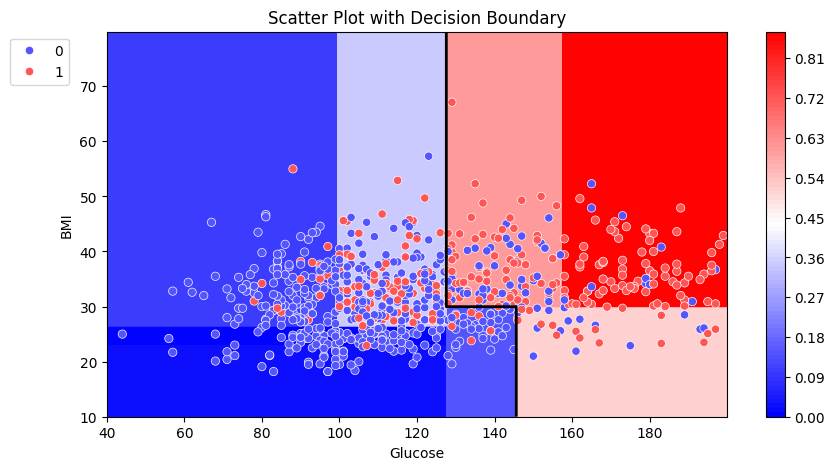

In [22]:
plot_probabilities_2d(X, y, dt_clf_2d)

Дерево решений разделило пространство на множество прямоугольных частей, каждая из которых соответствует определённому листу дерева. Количество этих областей равно количеству листьев — 8.

Так как вероятности в двух областях практически совпадают, на тепловой карте разница незаметна, области сливаются в одну и вы видите семь областей.

Можно рассчитать полученные метрики качества. Для этого предскажем наличие диабета для всех пациентов из матрицы наблюдений *X*, а затем рассчитаем метрики классификации с помощью функции `classification_report()` из библиотеки *sklearn*:

In [23]:
#Делаем предсказание класса для всего набора данных
y_pred = dt_clf_2d.predict(X)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       493
           1       0.69      0.62      0.65       264

    accuracy                           0.77       757
   macro avg       0.75      0.74      0.74       757
weighted avg       0.77      0.77      0.77       757



Даже с небольшой глубиной 3 дерево решений решает задачу классификации лучше, чем логистическая регрессия.

Давайте построим дерево решений без ограничения его максимальной глубины. Для этого нам просто не нужно задавать параметр `max_depth`:

In [24]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_bad = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=42 #генератор случайных чисел
)
#Обучаем дерево решений по алгоритму CART без ограничения его длины
dt_clf_bad.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [25]:
#Делаем предсказание класса для всего набора данных
y_pred = dt_clf_bad.predict(X)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       493
           1       1.00      0.97      0.98       264

    accuracy                           0.99       757
   macro avg       0.99      0.98      0.99       757
weighted avg       0.99      0.99      0.99       757



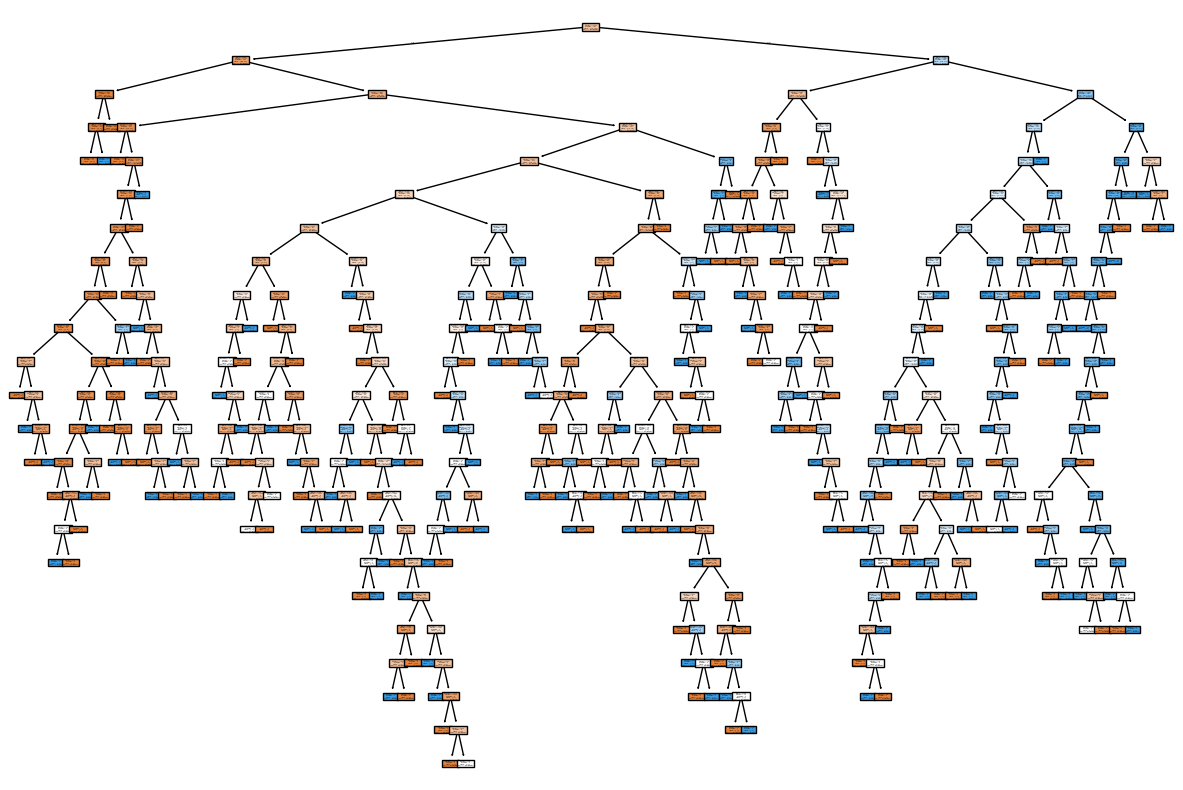

In [26]:
#Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))

#Строим граф 
tree_graph = tree.plot_tree(
    dt_clf_bad, #объект обученного дерева
    feature_names=X.columns, #наименования факторов
    class_names=["0 - Not diabetic", "1 - Diabetic"], #имена классов
    filled=True, #расцветка графа
);

Абсолютный хаос. Дерево задаёт огромное количество вопросов для того, чтобы предсказать правильный диагноз для каждого пациента из набора данных. Дерево настолько глубокое, что даже не помещается на экране.

Посмотреть получившуюся глубину дерева можно с помощью метода `get_depth()`:

In [27]:
dt_clf_bad.get_depth()

22

c:\Users\Антон\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


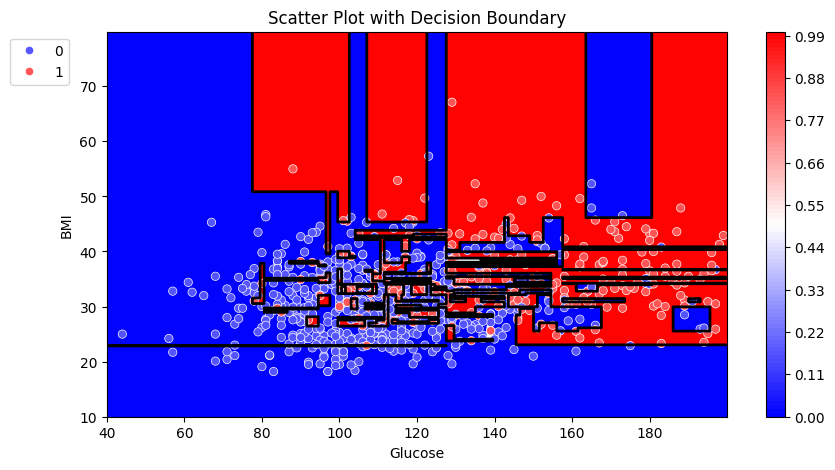

In [28]:
#Посмотрим на разделяющую поверхность
plot_probabilities_2d(X, y, dt_clf_bad)

Перед нами типичная картина переобучения дерева решений. Дерево решений разделило пространство на огромное количество отдельных частей, чтобы обозначить все точки из обучающего набора данных правильным классом (уменьшить энтропию до нуля).

Конечно же, такая модель не имеет никакой обобщающей способности и никому не нужна.

Всегда используйте регуляризацию деревьев — ограничивайте их максимальную глубину (`max_depth`) и минимальное число объектов в листе (`min_samples_leaf`). К тому же всегда стоит иметь под рукой не только обучающий, но и тестовый набор данных, чтобы оценить переобучение.

Попробуем обучить дерево решений на всех признаках. Принцип остаётся тем же, меняется только матрица наблюдений *X*:

In [29]:
#Создаём матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [30]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_full = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=6, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
#Обучаем модель по алгоритму CART
dt_clf_full.fit(X, y)
 
#Делаем предсказание класса
y_pred = dt_clf_full.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       493
           1       0.84      0.69      0.76       264

    accuracy                           0.85       757
   macro avg       0.84      0.81      0.82       757
weighted avg       0.84      0.85      0.84       757



Ещё одна полезная особенность дерева решений. Она заключается в том, что дерево решений позволяет определить важность признаков. Важность признаков можно посмотреть, обратившись к атрибуту `feature_importances_`:

In [31]:
print(dt_clf_full.feature_importances_)

[0.02675774 0.36675873 0.03368236 0.04553664 0.24588118 0.14137465
 0.14000868]


Для удобства обычно строят столбчатую диаграмму:

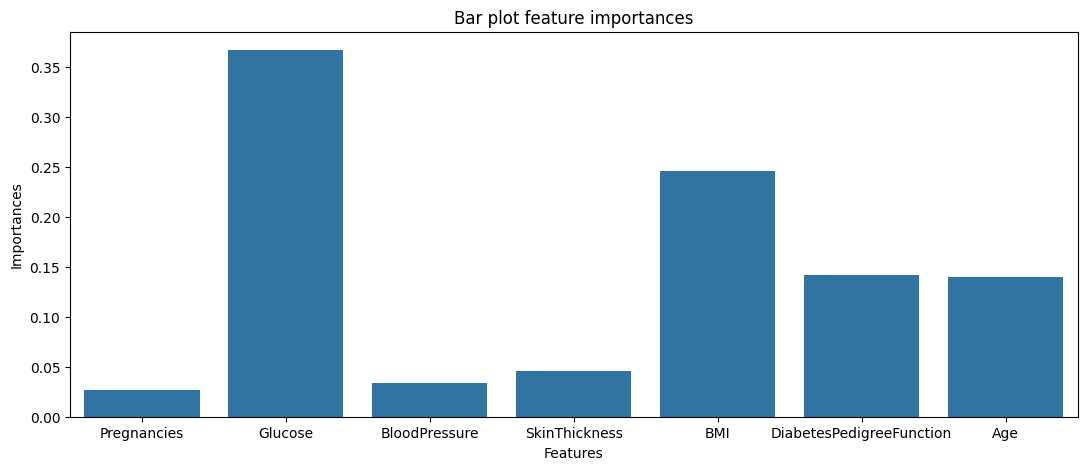

In [32]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
feature = X.columns #признаки
feature_importances = dt_clf_full.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax);
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

Часто «древесные» модели используются в качестве методов для отбора наиболее важных признаков. Это важно, когда в вашем наборе данных большое количество признаков, из-за которых обучение более сложных моделей может стать очень длительным. 

Кроме того, значимость признаков можно использовать в рамках анализа бизнес-процессов. Значимость позволяет понять, на какие признаки стоит обратить наибольшее внимание, чтобы повысить, например, точность их измерения.

Не стоит приравнивать значимость к корреляции. Корреляция — это коэффициент линейной зависимости, а значимость может отражать и нелинейные связи (в зависимости от сложности дерева).

In [33]:
# Задание 6.10

df = pd.read_csv("data/diabetes_cleaned.csv")

X = df.drop(columns="Outcome")
y = df["Outcome"]

#Создаём объект класса DecisionTreeClassifier
dt_clf_full = tree.DecisionTreeClassifier(
    criterion='gini', #критерий информативности
    max_depth=6, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)

#Обучаем модель по алгоритму CART
dt_clf_full.fit(X, y)

#Делаем предсказание класса
y_pred = dt_clf_full.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       493
           1       0.85      0.73      0.78       264

    accuracy                           0.86       757
   macro avg       0.85      0.83      0.84       757
weighted avg       0.86      0.86      0.86       757



# <center>Ансамблевые модели</center>

**Ансамблевые модели** или просто **ансамбли (ensembles)** — это метод машинного обучения, где несколько простых моделей (часто называемых «слабыми учениками») обучаются для решения одной и той же задачи и объединяются для получения лучших результатов.

Необходимость использования ансамблей может возникнуть тогда, когда вы уже нашли хорошую модель и никак больше не можете повысить её качество.

Существует три проверенных способа построения ансамблей:

1) **Бэггинг** — параллельно обучаем множество одинаковых моделей, а для предсказания берём среднее по предсказаниям каждой из моделей.

2) **Бустинг** — последовательно обучаем множество одинаковых моделей, где каждая новая модель концентрируется на тех примерах, где предыдущая допустила ошибку.

3) **Стекинг** — параллельно обучаем множество разных моделей, отправляем их результаты в финальную модель, и уже она принимает решение.

## <center>Бэггинг</center>

**Бэггинг (bagging)** — это алгоритм построения ансамбля путём параллельного обучения множества независимых друг от друга моделей.

В основе алгоритма лежит статистический метод, который называется **бутстрэпом (bootstrap)**. Идея бутстрэпа заключается в генерации $k$ выборок размера $n$ (бутстрэп-выборок) из исходного набора данных размера $m$ путём случайного выбора элементов с повторениями в каждом из наблюдений. 

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@ML_3_7_1.png)

Мы взяли исходный набор данных размером $m=12$ наблюдений и сгенерировали $k=3$ бутстрэп-выборки размером $n=8$ наблюдений. Обратите внимание, что наблюдения в выборках могут повторяться.

В частном случае можно генерировать выборки того же размера, то есть $n=m$. Таким образом, мы из набора данных создаём  датасетов из исходного того же размера.

Давайте обучим $k$ одинаковых моделей на каждой из сгенерированных выборок, сделаем предсказания, а затем усредним их. Так мы получим бэггинг.

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@ML_3_7_2.png)

В случае классификации «усреднение» означает мажоритарное голосование (принцип большинства голосов). То есть объект относится к тому классу, за который проголосовало большинство алгоритмов.

Важно отметить, что в бэггинге в голосовании принимает участие модель одного вида. Эта модель называется **базовой моделью (base model)**. Нельзя обучить на половине сгенерированных наборов данных логистические регрессии, а на второй половине — деревья решений.

Есть два утверждения:

* Смещение (*bias*) бэггинг-ансамбля не больше ($\leq$) смещения одного алгоритма из этого ансамбля.

* Однако разброс (*variance*) бэггинг-ансамбля в $k$ раз меньше, чем разброс одного алгоритма из ансамбля, где $k$ — количество алгоритмов в ансамбле.

**Что это значит в переводе с математического?**

Теорема гарантирует, что средняя ошибка ансамбля, построенного по принципу бэггинга, не выше, чем средняя ошибка базовой модели, но при этом шанс переобучения алгоритма значительно ниже.

## <center>Случайный лес</center>

**Случайный лес (Random Forest)** — это самая распространённая реализация бэггинга, основанная на использовании в качестве базовой модели дерева решений. 

Помимо бутстрэпа, случайный лес использует метод случайных подпространств. Суть этого метода заключается в том, что каждая модель обучается не на всех признаках, а только на части из них. Такой подход позволяет уменьшить коррелированность между ответами деревьев и сделать их независимыми друг от друга.

**<u>Алгоритм построения случайного леса для задачи классификации</u>**

Пусть количество объектов в наборе данных равно *N*, а количество признаков — *M*. То есть размер набора данных — *(N, M)*. Количество деревьев в лесу равно K. Тогда для обучения случайного леса необходимо выполнить следующие шаги:

1) С помощью бутстрэпа создать *K* наборов данных размера *(N, M)*.

2) Для каждого сгенерированного набора данных применить метод случайных подпространств: выбрать *L < M* случайных признаков и получить *K* новых наборов данных размером *(N, L)*.

3) На каждом наборе данных обучить дерево решений.

Когда поступят новые данные, нам нужно будет прогнать их через каждое дерево и объединить результаты отдельных деревьев мажоритарным голосованием или путём комбинирования вероятностей.

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@ML_3_7_3.png)

## <center>Случайный лес в Sklearn</center>

*P.S. Смотри блокнот "extra_4"*